In [1]:
import nltk

In [2]:
press = "A government minister has defended long delays to a military spending plan that are also stalling the UK’s next-generation Tempest fighter jet programme, but refused to say when it will be complete. The defence investment plan (DIP), originally expected last autumn, has faced repeated postponements amid warnings that the military faces a £28bn funding gap over the next four years. Luke Pollard, the minister for defence readiness and industry, told the Guardian the plan is “a bigger task than many people outside defence realise”. It will mean “fundamentally changing the shape of our armed forces, so pivoting, in particular, towards more autonomy”, he said, while also stressing the need to refill military stockpiles sent to Ukraine in recent years. “It is not a simple matter of just replacing tank A with tank B.” The plan will show how the government will fund its strategic defence review (SDR), the blueprint for transforming the military amid growing threats from Russia and rising commitments to Nato. Ministers accepted all the SDR’s recommendations when it was published last June. But the head of the military, Air Chief Marshal Sir Richard Knighton, told MPs last month that defence cuts would be needed without more funding. Earlier this week, Keir Starmer reportedly convened advisers to try to find a way to overcome the funding gap. One option could be to ease chancellor Rachel Reeves’s fiscal rules to boost defence spending, reported the Financial Times. ​​A government spokesperson said the fiscal rules “are non-negotiable”."

sentences = nltk.sent_tokenize(press)
print(sentences)

['A government minister has defended long delays to a military spending plan that are also stalling the UK’s next-generation Tempest fighter jet programme, but refused to say when it will be complete.', 'The defence investment plan (DIP), originally expected last autumn, has faced repeated postponements amid warnings that the military faces a £28bn funding gap over the next four years.', 'Luke Pollard, the minister for defence readiness and industry, told the Guardian the plan is “a bigger task than many people outside defence realise”.', 'It will mean “fundamentally changing the shape of our armed forces, so pivoting, in particular, towards more autonomy”, he said, while also stressing the need to refill military stockpiles sent to Ukraine in recent years.', '“It is not a simple matter of just replacing tank A with tank B.” The plan will show how the government will fund its strategic defence review (SDR), the blueprint for transforming the military amid growing threats from Russia an

In [3]:
words = nltk.word_tokenize(press)
print(words)

['A', 'government', 'minister', 'has', 'defended', 'long', 'delays', 'to', 'a', 'military', 'spending', 'plan', 'that', 'are', 'also', 'stalling', 'the', 'UK', '’', 's', 'next-generation', 'Tempest', 'fighter', 'jet', 'programme', ',', 'but', 'refused', 'to', 'say', 'when', 'it', 'will', 'be', 'complete', '.', 'The', 'defence', 'investment', 'plan', '(', 'DIP', ')', ',', 'originally', 'expected', 'last', 'autumn', ',', 'has', 'faced', 'repeated', 'postponements', 'amid', 'warnings', 'that', 'the', 'military', 'faces', 'a', '£28bn', 'funding', 'gap', 'over', 'the', 'next', 'four', 'years', '.', 'Luke', 'Pollard', ',', 'the', 'minister', 'for', 'defence', 'readiness', 'and', 'industry', ',', 'told', 'the', 'Guardian', 'the', 'plan', 'is', '“', 'a', 'bigger', 'task', 'than', 'many', 'people', 'outside', 'defence', 'realise', '”', '.', 'It', 'will', 'mean', '“', 'fundamentally', 'changing', 'the', 'shape', 'of', 'our', 'armed', 'forces', ',', 'so', 'pivoting', ',', 'in', 'particular', ',',

In [4]:
freq = nltk.FreqDist(press.lower().split())
freq

FreqDist({'the': 19, 'to': 10, 'a': 6, 'defence': 6, 'military': 4, 'plan': 4, 'will': 4, 'government': 3, 'that': 3, 'it': 3, ...})

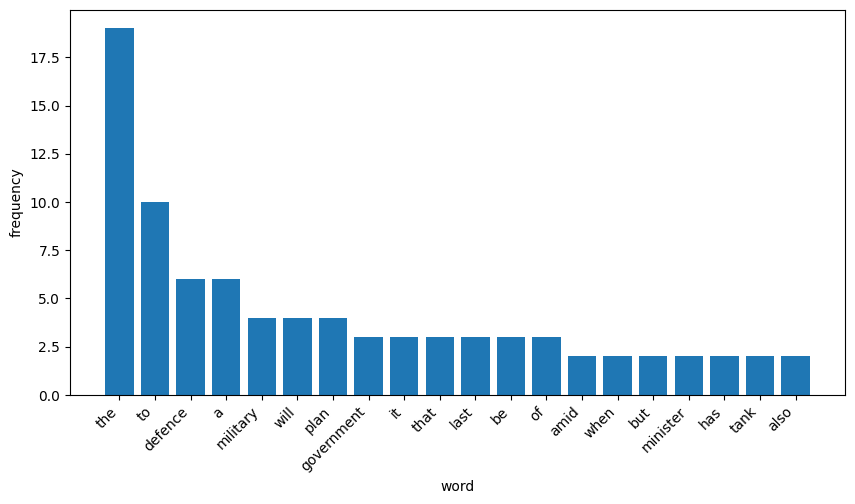

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(freq.items(),columns=["word", "frequency"])
df = df.sort_values("frequency", ascending=False).head(20)

plt.figure(figsize =(10,5))
plt.bar(x =df['word'], height=df['frequency'])
plt.xticks(rotation=45, ha="right")
plt.xlabel("word")
plt.ylabel("frequency")
plt.show()

In [6]:
tokens_clean = []
for wd in words:
    if wd.isalpha() and wd not in nltk.corpus.stopwords.words("english"):
        tokens_clean.append(wd.lower())

df2 = (pd.Series(tokens_clean, name="word").value_counts().rename("frequency").reset_index().head(20))
df2

,word,frequency
0,defence,6
1,military,5
2,plan,4
3,government,3
4,last,3
5,funding,3
6,a,2
7,minister,2
8,spending,2
9,also,2


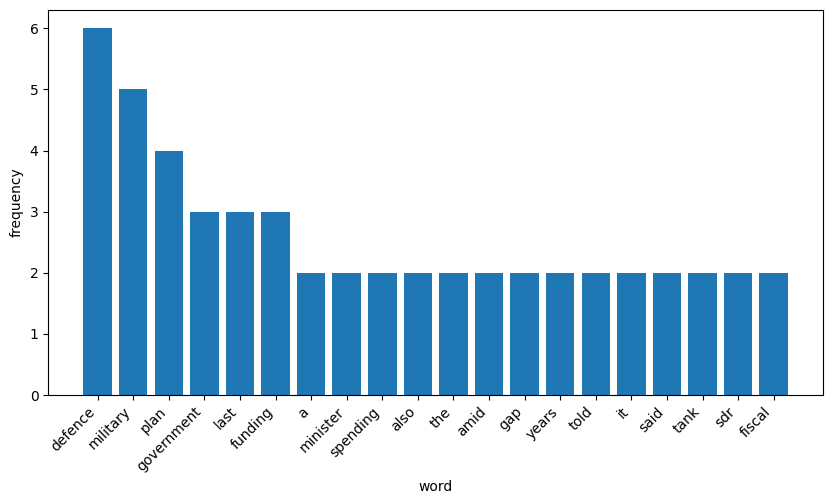

In [7]:
plt.figure(figsize=(10,5))
plt.bar(x=df2["word"], height=df2["frequency"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("word")
plt.ylabel("frequency")
plt.show()

---
PARTIE NLP 2
---

In [8]:
from nltk.stem import SnowballStemmer
stem_en = SnowballStemmer("english")
stem_press = [stem_en.stem(word) for word in tokens_clean]
nltk.FreqDist(stem_press)

FreqDist({'defenc': 6, 'militari': 5, 'plan': 4, 'fund': 4, 'govern': 3, 'minist': 3, 'last': 3, 'a': 2, 'spend': 2, 'also': 2, ...})

Les mots ayant la racine "gouvern" ou "minist" sont remontés plus haut dans le classement ==> + PERTINENCE

In [20]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp(press)

lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space and token.text.lower() not in nltk.corpus.stopwords.words("english")]

nltk.FreqDist(lemmas)

FreqDist({'defence': 6, 'military': 5, 'plan': 4, 'government': 3, 'minister': 3, '’s': 3, 'say': 3, 'last': 3, 'funding': 3, 'spending': 2, ...})

Les mots sont globalement les mêmes 